# Goal

This is a tutorial based on Keras/Tensorflow for prediciting timeseries:

https://www.tensorflow.org/tutorials/structured_data/time_series

The goal of this is to quickly familiarize one self with the basics of time series forecasting using Keras/Tensorflow. This first notebook deals mainly with data prep and feature engineering.

# Setup

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False

# Data Set

## Weather Data

In [2]:
file_name = 'jena_climate_2009_2016.csv.zip'
origin = f'https://storage.googleapis.com/tensorflow/tf-keras-datasets/{file_name}'

! wget $origin
! unzip $file_name 
;

In [3]:
df = pd.read_csv(file_name)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.shape

(420551, 15)

In [5]:
df.iloc[5]

Date Time          01.01.2009 01:00:00
p (mbar)                         996.5
T (degC)                         -8.05
Tpot (K)                        265.38
Tdew (degC)                      -8.78
rh (%)                            94.4
VPmax (mbar)                      3.33
VPact (mbar)                      3.14
VPdef (mbar)                      0.19
sh (g/kg)                         1.96
H2OC (mmol/mol)                   3.15
rho (g/m**3)                   1307.86
wv (m/s)                          0.21
max. wv (m/s)                     0.63
wd (deg)                         192.7
Name: 5, dtype: object

## Sub-Sample Data on Hourly Basis 

In [6]:
# slice = [start:stop:step]. We start at index 5 and take every 6th index
df_h = df[5::6]
df_h.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
df_h.shape

(70091, 15)

## Plots

In [8]:
df_h.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

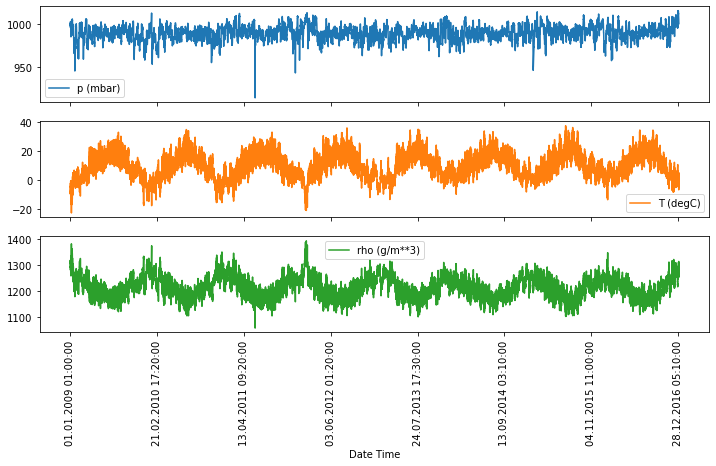

In [9]:
# pressure, temperature, absolute humidity
plot_cols = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']
plot_features = df_h[plot_cols]
plot_features.index = df_h['Date Time']

plot_features.plot(subplots=True);
plt.xticks(rotation=90);

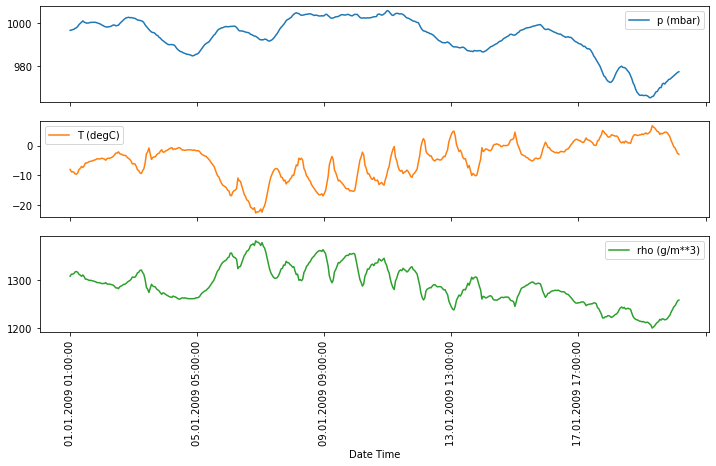

In [10]:
plot_features[:480].plot(subplots=True);
plt.xticks(rotation=90);

## Stats

In [11]:
df_h.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


### Wind Velocity

While the velocity, in general, can be a negative number, in this context it appears erroneous. We replace all negative values with 0.0. 

In [12]:
df_h.loc[df_h['wv (m/s)'] < 0, 'wv (m/s)'] = 0.0
df_h.loc[df_h['max. wv (m/s)'] < 0, 'max. wv (m/s)'] = 0.0

/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
df_h[['wv (m/s)', 'max. wv (m/s)', 'wd (deg)']].describe().T

,count,mean,std,min,25%,50%,75%,max
wv (m/s),70091.0,2.130539,1.543098,0.0,0.99,1.76,2.86,14.01
max. wv (m/s),70091.0,3.533671,2.343417,0.0,1.76,2.98,4.74,23.50
wd (deg),70091.0,174.789095,86.619431,0.0,125.30,198.10,234.00,360.00


### Wind


Text(0, 0.5, 'Wind Velocity (m/s)')

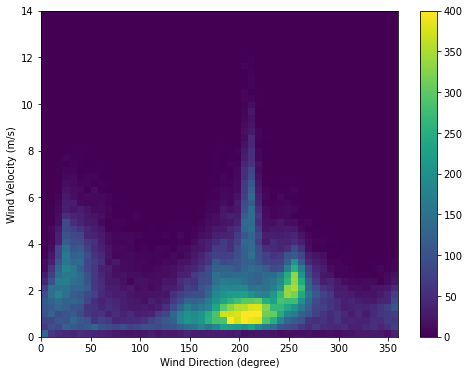

In [14]:
_, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.hist2d(df_h['wd (deg)'], df_h['wv (m/s)'], bins=[50, 50], vmax=400);
plt.colorbar()
plt.xlabel('Wind Direction (degree)')
plt.ylabel('Wind Velocity (m/s)')

Convert the wind velocity and wind direction into a vector.

In [15]:
wv = df_h.pop('wv (m/s)')
max_wv = df_h.pop('max. wv (m/s)')
wd = df_h.pop('wd (deg)')

In [16]:
# convert wind direction to radians
wd = wd * np.pi / 180

# Compute the x and y components of wind velocity
df_h.loc[:, 'Wx'] = wv * np.cos(wd)
df_h.loc[:, 'Wy'] = wv * np.sin(wd)

# x and y components of maximum wind velocity
df_h.loc[:, 'max_Wx'] = max_wv * np.cos(wd)
df_h.loc[:, 'max_Wy'] = max_wv * np.sin(wd)

/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
df_h.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max_Wx', 'max_Wy'],
      dtype='object')

In [18]:
df_h[['Wx', 'Wy']].describe().T

,count,mean,std,min,25%,50%,75%,max
Wx,70091.0,-0.627813,1.987440,-11.305514,-1.470727,-0.633142,0.299975,8.244699
Wy,70091.0,-0.407068,1.552621,-8.274385,-1.364699,-0.293467,0.450077,7.733831


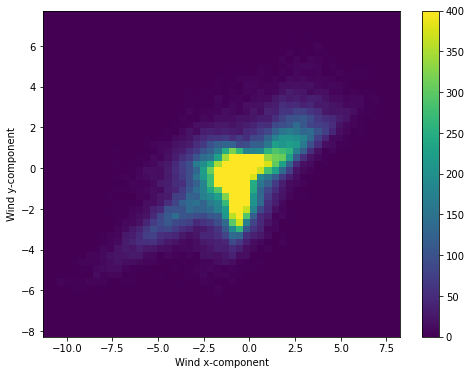

In [19]:
_, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.hist2d(df_h['Wx'], df_h['Wy'], bins=[50, 50], vmax=400);
plt.colorbar()
plt.xlabel('Wind x-component')
plt.ylabel('Wind y-component');

## Time

In [20]:
df_h.loc[:, 'Date Time'] = pd.to_datetime(df_h['Date Time'])
df_h['Date Time'].map(pd.Timestamp.timestamp).head()

/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


5     1.230772e+09
11    1.230775e+09
17    1.230779e+09
23    1.230782e+09
29    1.230786e+09
Name: Date Time, dtype: float64

### Convert Time into Sine-Cosine Signals

In [21]:
df_h.loc[:, 'Date Time'] = df_h['Date Time'].map(pd.Timestamp.timestamp)

In [22]:
days = 24 * 60 * 60
year = days * 365.25

df_h.loc[:, 'Day sin'] = np.sin(df_h['Date Time'] * 2 * np.pi / days)
df_h.loc[:, 'Day cos'] = np.cos(df_h['Date Time'] * 2 * np.pi / days)
df_h.loc[:, 'Year sin'] = np.sin(df_h['Date Time'] * 2 * np.pi / year)
df_h.loc[:, 'Year cos'] = np.cos(df_h['Date Time'] * 2 * np.pi / year)

/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


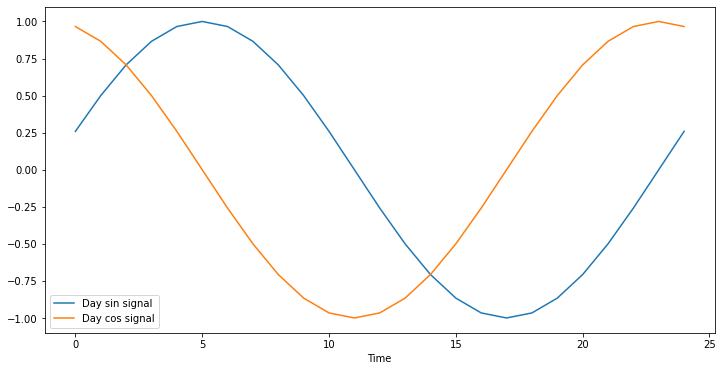

In [23]:
plt.plot(df_h['Day sin'].values[:25], label='Day sin signal')
plt.plot(df_h['Day cos'].values[:25], label='Day cos signal')
plt.xlabel('Time')
plt.legend();

In [24]:
df_h.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max_Wx', 'max_Wy',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [25]:
df_h.pop('Date Time')

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

In [26]:
df_h.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max_Wx', 'max_Wy',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

## Data Splitting

In [27]:
column_indices = {name: idx for idx, name in enumerate(df_h.columns)}
n = df_h.shape[0]

df_train = df_h.iloc[0 : int(0.7 * n)]
df_val = df_h.iloc[int(0.7 * n) : int(0.9 * n)]
df_test = df_h.iloc[int(0.9 * n) : ]

## Data Normalization

In [28]:
train_mean = df_train.mean()
train_std = df_train.std()

In [29]:
train_mean.reset_index()

,index,0
0,p (mbar),988.656343
1,T (degC),9.108207
2,Tpot (K),283.194958
3,Tdew (degC),4.599605
4,rh (%),75.906008
5,VPmax (mbar),13.355098
6,VPact (mbar),9.356960
7,VPdef (mbar),3.998056
8,sh (g/kg),5.913550
9,H2OC (mmol/mol),9.466371


In [30]:
train_std.reset_index()

,index,0
0,p (mbar),8.297466
1,T (degC),8.654950
2,Tpot (K),8.724746
3,Tdew (degC),6.972275
4,rh (%),16.555336
5,VPmax (mbar),7.694738
6,VPact (mbar),4.208260
7,VPdef (mbar),4.817741
8,sh (g/kg),2.671252
9,H2OC (mmol/mol),4.260055


In [31]:
norm_train = (df_train - train_mean) / train_std
norm_val = (df_val - train_mean) / train_std
norm_test = (df_test - train_mean) / train_std

In [32]:
norm_train.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max_Wx,max_Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.040321,1.424669
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.039303,1.424663
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.038285,1.424657
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.037267,1.424650
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.036249,1.424643


## Distribution of Features

In [33]:
df_std = (df_h - train_mean) / train_std
df_std = df_std.melt(var_name='Columns', value_name='Normalized')
df_std.head()

,Columns,Normalized
0,p (mbar),0.945308
1,p (mbar),0.959770
2,p (mbar),0.986284
3,p (mbar),1.004362
4,p (mbar),1.061006


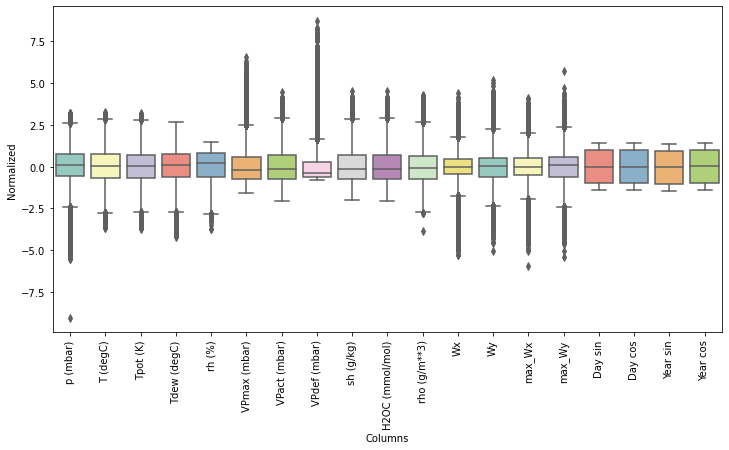

In [34]:
ax = sns.boxplot(x="Columns", y="Normalized", data=df_std, palette="Set3");
ax.set_xticklabels(labels=df_h.columns, rotation=90);

## Save Train, Validation and Test Data

In [35]:
norm_train.to_csv('norm_train.csv', index=False)
norm_val.to_csv('norm_val.csv', index=False)
norm_test.to_csv('norm_test.csv', index=False)